In [68]:
import pandas as pd
df = pd.read_csv('C:/Users/Hp/Desktop/final_year_project/project/drug data_csv.csv', usecols=['Cell_Line_Name','Drug_Name','Cosmic_ID','Drug_ID','TCGA_Classification','PSA','Tissue','Tissue_Sub-type','IS_Mutated','IC50'])
df

,Cell_Line_Name,Drug_Name,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50
0,697,Zoledronate,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538
1,697,ZM447439,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715
2,697,YK-4-279,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283
3,697,XAV939,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320
4,697,WZ4003,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157
...,...,...,...,...,...,...,...,...,...,...
243461,ZR-75-30,615590,909907,1839,BRCA,3.0,breast,breast,0,4.222822
243462,ZR-75-30,150412,909907,1836,BRCA,3.0,breast,breast,0,4.274296
243463,ZR-75-30,123829,909907,1820,BRCA,3.0,breast,breast,0,4.683226
243464,ZR-75-30,123138,909907,1824,BRCA,1.0,breast,breast,0,4.137158


In [69]:
columns_to_remove = ['Cell_Line_Name', 'Drug_Name']
df= df.drop(columns_to_remove, axis=1)

In [70]:
df

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157
...,...,...,...,...,...,...,...,...
243461,909907,1839,BRCA,3.0,breast,breast,0,4.222822
243462,909907,1836,BRCA,3.0,breast,breast,0,4.274296
243463,909907,1820,BRCA,3.0,breast,breast,0,4.683226
243464,909907,1824,BRCA,1.0,breast,breast,0,4.137158


In [71]:
import numpy as np

In [72]:
from sklearn.impute import SimpleImputer

In [73]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [74]:
x=df[['Cosmic_ID','Drug_ID','TCGA_Classification','PSA','Tissue','Tissue_Sub-type','IS_Mutated']].values

In [75]:
x

array([[906800, 1802, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       [906800, 1050, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       [906800, 1239, 'UNCLASSIFIED', ..., 'blood',
        'lymphoblastic_leukemia', 0],
       ...,
       [909907, 1820, 'BRCA', ..., 'breast', 'breast', 0],
       [909907, 1824, 'BRCA', ..., 'breast', 'breast', 0],
       [909907, 1826, 'BRCA', ..., 'breast', 'breast', 0]], dtype=object)

In [76]:
y=df[['IC50']].values

In [77]:
y

array([[ 2.32453756],
       [-0.75871526],
       [-0.57128349],
       ...,
       [ 4.68322562],
       [ 4.1371579 ],
       [ 4.74343917]])

In [78]:
for col in df.columns:
    print(col,': ',len(df[col].unique()),' labels')


Cosmic_ID :  969  labels
Drug_ID :  297  labels
TCGA_Classification :  33  labels
PSA :  25  labels
Tissue :  14  labels
Tissue_Sub-type :  56  labels
IS_Mutated :  2  labels
IC50 :  241895  labels


In [79]:
pd.get_dummies(df,drop_first=True).shape

(243466, 102)

In [80]:
df.TCGA_Classification.value_counts().sort_values(ascending=False).head(10)

UNCLASSIFIED    45970
LUAD            15747
SCLC            13638
BRCA            13187
SKCM            12699
COREAD          12628
HNSC             9408
ESCA             9185
GBM              8432
OV               8210
Name: TCGA_Classification, dtype: int64

In [81]:
top_6=[x for x in df.TCGA_Classification.value_counts().sort_values(ascending=False).head(6).index]
top_6

['UNCLASSIFIED', 'LUAD', 'SCLC', 'BRCA', 'SKCM', 'COREAD']

In [82]:
for label in top_6:
    df[label]=np.where(df['TCGA_Classification']==label,1,0)
    
df[['TCGA_Classification']+top_6].head(10)

,TCGA_Classification,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD
0,UNCLASSIFIED,1,0,0,0,0,0
1,UNCLASSIFIED,1,0,0,0,0,0
2,UNCLASSIFIED,1,0,0,0,0,0
3,UNCLASSIFIED,1,0,0,0,0,0
4,UNCLASSIFIED,1,0,0,0,0,0
5,UNCLASSIFIED,1,0,0,0,0,0
6,UNCLASSIFIED,1,0,0,0,0,0
7,UNCLASSIFIED,1,0,0,0,0,0
8,UNCLASSIFIED,1,0,0,0,0,0
9,UNCLASSIFIED,1,0,0,0,0,0


In [83]:
def one_hot_top_x(dff,variable,top_x_labels):
    for label in top_x_labels:
        dff[variable+'_'+label]=np.where(df[variable]==label, 1, 0)


one_hot_top_x(df,'TCGA_Classification',top_6)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD,TCGA_Classification_UNCLASSIFIED,TCGA_Classification_LUAD,TCGA_Classification_SCLC,TCGA_Classification_BRCA,TCGA_Classification_SKCM,TCGA_Classification_COREAD
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,0,0,0,0,1,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,0,0,0,0,1,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,0,0,0,0,1,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,0,0,0,0,1,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,0,0,0,0,1,0,0,0,0,0


In [84]:
df.shape[1]

20

In [85]:
df.Tissue.value_counts().sort_values(ascending=False).head(10)

lung                    46904
blood                   42545
urogenital_system       26492
digestive_system        25122
nervous_system          20648
aero_digestive_tract    19155
breast                  13471
skin                    13239
bone                    10100
pancreas                 8099
Name: Tissue, dtype: int64

In [86]:
top_9=[x for x in df.Tissue.value_counts().sort_values(ascending=False).head(9).index]
top_9

['lung',
 'blood',
 'urogenital_system',
 'digestive_system',
 'nervous_system',
 'aero_digestive_tract',
 'breast',
 'skin',
 'bone']

In [87]:
for label in top_9:
    df[label]=np.where(df['Tissue']==label,1,0)
    
df[['Tissue']+top_9].head(10)

,Tissue,lung,blood,urogenital_system,digestive_system,nervous_system,aero_digestive_tract,breast,skin,bone
0,blood,0,1,0,0,0,0,0,0,0
1,blood,0,1,0,0,0,0,0,0,0
2,blood,0,1,0,0,0,0,0,0,0
3,blood,0,1,0,0,0,0,0,0,0
4,blood,0,1,0,0,0,0,0,0,0
5,blood,0,1,0,0,0,0,0,0,0
6,blood,0,1,0,0,0,0,0,0,0
7,blood,0,1,0,0,0,0,0,0,0
8,blood,0,1,0,0,0,0,0,0,0
9,blood,0,1,0,0,0,0,0,0,0


In [88]:

one_hot_top_x(df,'Tissue',top_9)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,...,bone,Tissue_lung,Tissue_blood,Tissue_urogenital_system,Tissue_digestive_system,Tissue_nervous_system,Tissue_aero_digestive_tract,Tissue_breast,Tissue_skin,Tissue_bone
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,...,0,0,1,0,0,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,...,0,0,1,0,0,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,...,0,0,1,0,0,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,...,0,0,1,0,0,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,...,0,0,1,0,0,0,0,0,0,0


In [89]:
df['Tissue_Sub-type'].value_counts().sort_values(ascending=False).head(10)

lung_NSCLC_adenocarcinoma    16378
lung_small_cell_carcinoma    13638
breast                       13471
melanoma                     12699
large_intestine              12628
glioma                       12061
ovary                        10492
head_and_neck                 9970
oesophagus                    9185
pancreas                      8099
Name: Tissue_Sub-type, dtype: int64

In [90]:
top_7=[x for x in df['Tissue_Sub-type'].value_counts().sort_values(ascending=False).head(9).index]
top_7

['lung_NSCLC_adenocarcinoma',
 'lung_small_cell_carcinoma',
 'breast',
 'melanoma',
 'large_intestine',
 'glioma',
 'ovary',
 'head_and_neck',
 'oesophagus']

In [91]:
for label in top_7:
    df[label]=np.where(df['Tissue_Sub-type']==label,1,0)
    
df[['Tissue_Sub-type']+top_7].head(10)


,Tissue_Sub-type,lung_NSCLC_adenocarcinoma,lung_small_cell_carcinoma,breast,melanoma,large_intestine,glioma,ovary,head_and_neck,oesophagus
0,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
1,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
2,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
3,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
4,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
5,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
6,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
7,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
8,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0
9,lymphoblastic_leukemia,0,0,0,0,0,0,0,0,0


In [92]:
one_hot_top_x(df,'Tissue_Sub-type',top_7)
df.head()

,Cosmic_ID,Drug_ID,TCGA_Classification,PSA,Tissue,Tissue_Sub-type,IS_Mutated,IC50,UNCLASSIFIED,LUAD,...,oesophagus,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus
0,906800,1802,UNCLASSIFIED,2.0,blood,lymphoblastic_leukemia,0,2.324538,1,0,...,0,0,0,0,0,0,0,0,0,0
1,906800,1050,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,-0.758715,1,0,...,0,0,0,0,0,0,0,0,0,0
2,906800,1239,UNCLASSIFIED,20.0,blood,lymphoblastic_leukemia,0,-0.571283,1,0,...,0,0,0,0,0,0,0,0,0,0
3,906800,1268,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,4.316320,1,0,...,0,0,0,0,0,0,0,0,0,0
4,906800,1614,UNCLASSIFIED,10.0,blood,lymphoblastic_leukemia,0,2.138157,1,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
columns_to_remove = ['TCGA_Classification','Tissue', 'Tissue_Sub-type']

df = df.drop(columns_to_remove, axis=1)

In [94]:
df

,Cosmic_ID,Drug_ID,PSA,IS_Mutated,IC50,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,...,oesophagus,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus
0,906800,1802,2.0,0,2.324538,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,906800,1050,10.0,0,-0.758715,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,906800,1239,20.0,0,-0.571283,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,906800,1268,10.0,0,4.316320,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,906800,1614,10.0,0,2.138157,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243461,909907,1839,3.0,0,4.222822,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243462,909907,1836,3.0,0,4.274296,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243463,909907,1820,3.0,0,4.683226,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
243464,909907,1824,1.0,0,4.137158,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
column_to_move = 'IC50'

df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]

In [96]:
df

,Cosmic_ID,Drug_ID,PSA,IS_Mutated,UNCLASSIFIED,LUAD,SCLC,BRCA,SKCM,COREAD,...,Tissue_Sub-type_lung_NSCLC_adenocarcinoma,Tissue_Sub-type_lung_small_cell_carcinoma,Tissue_Sub-type_breast,Tissue_Sub-type_melanoma,Tissue_Sub-type_large_intestine,Tissue_Sub-type_glioma,Tissue_Sub-type_ovary,Tissue_Sub-type_head_and_neck,Tissue_Sub-type_oesophagus,IC50
0,906800,1802,2.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.324538
1,906800,1050,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.758715
2,906800,1239,20.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.571283
3,906800,1268,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.316320
4,906800,1614,10.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.138157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243461,909907,1839,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.222822
243462,909907,1836,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.274296
243463,909907,1820,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.683226
243464,909907,1824,1.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,4.137158


In [97]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor  # For regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 


In [100]:
X = df.drop('IC50', axis=1)
y = df['IC50']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
rf= RandomForestRegressor(n_estimators=100, random_state=42, imp)

In [103]:
rf.fit(X_train, y_train)

KeyboardInterrupt: 

In [56]:
y_pred=rf.predict(X_test)
from sklearn import datasets, metrics

In [57]:
r2=metrics.r2_score(y_test,y_pred)
r2

0.7288175287724183

In [58]:
mse = mean_squared_error(y_test, y_pred)
mse

2.076441186135701

In [59]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

1.0717530919188036

In [60]:
y_pred

array([ 2.9863727 , -1.12769244, -3.81311056, ...,  2.03930066,
        2.60957235, -2.11241733])

In [61]:
y_pred=pd.DataFrame(y_pred,columns=['yPredict'])

In [62]:
y_pred

,yPredict
0,2.986373
1,-1.127692
2,-3.813111
3,3.891793
4,4.773788
...,...
73035,2.698399
73036,4.213842
73037,2.039301
73038,2.609572


In [63]:
y_test

39741     1.765990
75107    -1.340792
185802   -3.670702
62219     4.896541
184785    3.325199
            ...   
71776     1.641959
57880     3.997058
62089     4.873518
78459     2.556234
63158    -2.238375
Name: IC50, Length: 73040, dtype: float64

In [64]:
import seaborn as sns

In [65]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics

In [66]:
import matplotlib.pyplot as plt

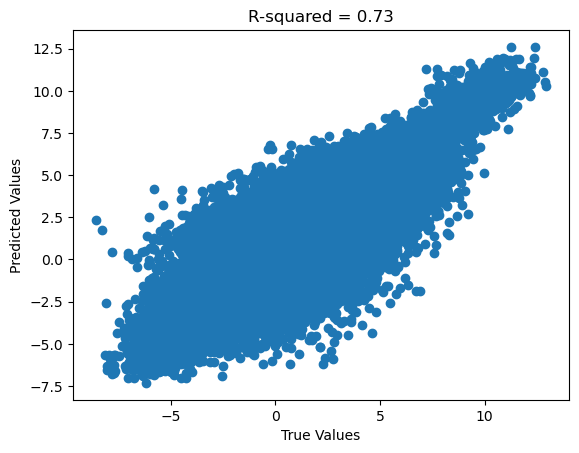

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R-squared = {r2:.2f}')
plt.show()